### LOCALLY WEIGHTED REGRESSION

It is a Non Parametric Algorithm, it can be used when number of features are small for ex 2-3. We have a modified cost function w(i) * ((y(i) - (theta * x(i))^2), for all values of i= 0 to n. We will fit this function for minimum.

Here w(i) is a weighting function which is defined as exp( ( (x(i) - x)^2 )/2 ).
If |x(i) - x| is small, w(i) = 1
   |x(i) - x| is large, w(i) = 0
   
Here, shape of the weighting function is like a Gaussian Bell Curve. Here hyperparameter 'tau' is introduced using which we can choose the fatter or thinner width for the curve, so it is bandwidth parameter

w(i) = exp( - ( (x(i) - x)^2 )/ (2 * tau * tau) )

Weighting in code is a diagonal matrix

In [3]:
# Importing Library
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)


In [134]:
data = pd.read_csv(r'C:\Users\amitk\Desktop\data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]


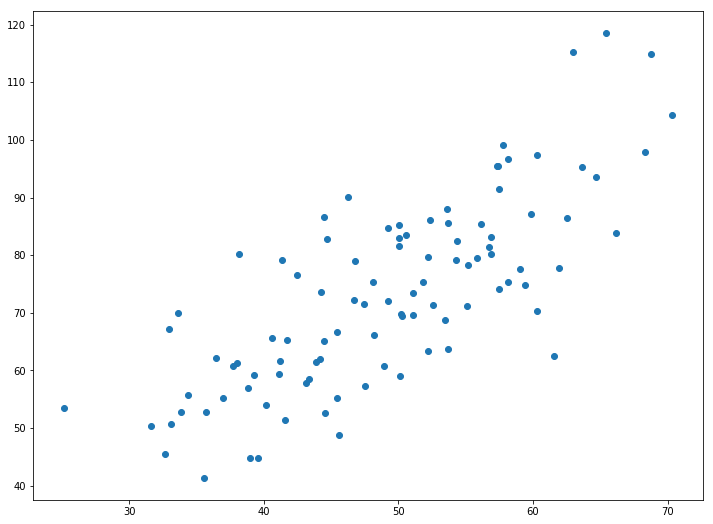

In [135]:
plt.scatter(X, Y)
plt.show()

In [137]:
# Defining Weighting Function
def wf(point, X, t):

  # m is the No of training examples .
    m = X.shape[0] 
    
  # Initialising W as an identity matrix.
    w = np.mat(np.eye(m)) 
    
  # Calculating weights for all training examples [x(i)'s].
    for i in range(m): 
        xi = X[i] 
        d = (-2 * t * t) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
    return w

In [138]:
def predict(X, y, point, tau): 
    
   # m = number of training examples. 
    m = X.shape[0] 
    
   # Appending a cloumn of ones in X to add the bias term.
#### Just one parameter: theta, that's why adding a column of ones        
#### to X and also adding a 1 for the point where we want to          
#### predict. 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    
   # point is the x where we want to make the prediction. 
    point_ = np.array([point, 1]) 
    
   # Calculating the weight matrix using the wm function we wrote      #  # earlier. 
    w = wm(point_, X_, tau) 
    
  # Calculating parameter theta using the formula.
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y)) 
    
  # Calculating predictions.  
    pred = np.dot(point_, theta) 
    
   # Returning the theta and predictions 
    return theta, pred

In [ ]:
# visualise predicted values with respect
# to original target values
  
Bandwidth = 0.1
X_test = np.linspace(-2, 2, 20)
Y_test = []
for query in X_test:
  theta, pred = predict(X, Y, query, Bandwidth)
  Y_test.append(pred[0][0])
horizontal_axis = np.array(X)
vertical_axis = np.array(Y)
plt.title("Tau / Bandwidth Param %.2f"% Bandwidth)
plt.scatter(horizontal_axis, vertical_axis)
Y_test = np.array(Y_test)
plt.scatter(X_test, Y_test, color ='red')
plt.show()